# Segement Anthing + 3D Box

![gdgligen](https://github.com/IDEA-Research/Grounded-Segment-Anything/raw/main/assets/mask_3dbox.png)

**Why this project?**
[Segment Anything](https://github.com/facebookresearch/segment-anything) and its following projects
focus on 2D images. In this project, we extend the scope to 3D world by combining [Segment Anything](https://github.com/facebookresearch/segment-anything) and [VoxelNeXt](https://github.com/dvlab-research/VoxelNeXt). When we provide a prompt (e.g., a point / box), the result is not only 2D segmentation mask, but also 3D boxes.

The core idea is that [VoxelNeXt](https://github.com/dvlab-research/VoxelNeXt) is a fully sparse 3D detector. It predicts 3D object upon each sparse voxel. We project 3D sparse voxels onto 2D images. And then 3D boxes can be generated for voxels in the SAM mask. 

- This project makes 3D object detection to be promptable.
- VoxelNeXt is based on sparse voxels that are easy to be related to the mask generated from segment anything.
- This project could facilitate 3D box labeling. 3D box can be obtained via a simple click on image. It might largely save human efforts, especially on autonuous driving scenes.

In [1]:
%cd 

!git clone https://github.com/IDEA-Research/Grounded-Segment-Anything


/home/sa11799x
fatal: destination path 'Grounded-Segment-Anything' already exists and is not an empty directory.


In [2]:
%cd /home/sa11799x/Documents/MajorProject/Notebooks/Grounded-Segment-Anything/voxelnext_3d_box
!pip install -q -r requirements.txt
%cd /home/sa11799x/Documents/MajorProject/Notebooks/Grounded-Segment-Anything/segment_anything
!pip install -q .
%cd /home/sa11799x/Documents/MajorProject/Notebooks/Grounded-Segment-Anything

/home/sa11799x/Documents/MajorProject/Notebooks/Grounded-Segment-Anything/voxelnext_3d_box
/home/sa11799x/Documents/MajorProject/Notebooks/Grounded-Segment-Anything/segment_anything
/home/sa11799x/Documents/MajorProject/Notebooks/Grounded-Segment-Anything


In [3]:
%pip install spconv-cu116
import spconv

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# from segment_anything import build_sam, SamPredictor 
from voxelnext_3d_box.model import Model
from voxelnext_3d_box.utils.image_projection import get_data_info, _draw_3dbox
from voxelnext_3d_box.utils.config import cfg, cfg_from_yaml_file

In [5]:
if os.path.exists('/home/sa11799x/Documents/MajorProject/Notebooks/Grounded-Segment-Anything/sam_vit_b_01ec64.pth') == False:
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
# !wget https://drive.google.com/file/d/17mQRXXUsaD0dlRzAKep3MQjfj8ugDsp9

In [6]:
!pip3 install torch==1.13.1+cu116 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://download.pytorch.org/whl/cu116


In [7]:
import torch
torch.cuda.is_available()

True

In [8]:
os.getcwd()
import gdown
url_pth = 'https://drive.google.com/file/d/17mQRXXUsaD0dlRzAKep3MQjfj8ugDsp9'
output_pth = '/home/sa11799x/Documents/MajorProject/Notebooks/Grounded-Segment-Anything/voxelnext_nuscenes_kernel1.pth'
url_demo = 'https://drive.google.com/file/d/1br0VDamameu7B1G1p4HEjj6LshGs5dHB'
output_demo = '/home/sa11799x/Documents/MajorProject/Notebooks/Grounded-Segment-Anything/points_demo.npy'
if os.path.exists(output_pth)== False:
    gdown.download(url_pth, output_pth, quiet=False)
if os.path.exists(output_demo) == False:
    gdown.download(url_demo,output_demo,quiet=False)


In [9]:
cfg_model = '/home/sa11799x/Documents/MajorProject/Notebooks/Grounded-Segment-Anything/voxelnext_3d_box/config.yaml'
device = 'cuda'
model_cfg = cfg_from_yaml_file(cfg_model, cfg)
model_cfg.SAM_TYPE = "vit_b"
model_cfg.SAM_CHECKPOINT = "/home/sa11799x/Documents/MajorProject/Notebooks/Grounded-Segment-Anything/sam_vit_b_01ec64.pth"
model_cfg.VOXELNEXT_CHECKPOINT = "/home/sa11799x/Documents/MajorProject/Notebooks/Grounded-Segment-Anything/voxelnext_nuscenes_kernel1.pth"
model = Model(model_cfg, device)

In [10]:
lidar2img_rt = np.array([[-1149.5,  940.9,  8.1, -646.8],
                         [-442.2, -114.6, -1270.2, -519.6],
                         [-0.95, -0.32, -0.03, -0.43],
                         [ 0,  0,  0, 1]])
image_path = "assets/n015-2018-08-02-17-16-37+0800__CAM_BACK_LEFT__1533201470447423.jpg"
image_id = image_path.split('/')[-1].rstrip("jpg")
point_dict = {"points": np.load("/home/sa11799x/Documents/MajorProject/Notebooks/Grounded-Segment-Anything/points_demo.npy")}

In [11]:
image = cv2.imread(image_path)
prompt_point = np.array([[560, 500]])
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)

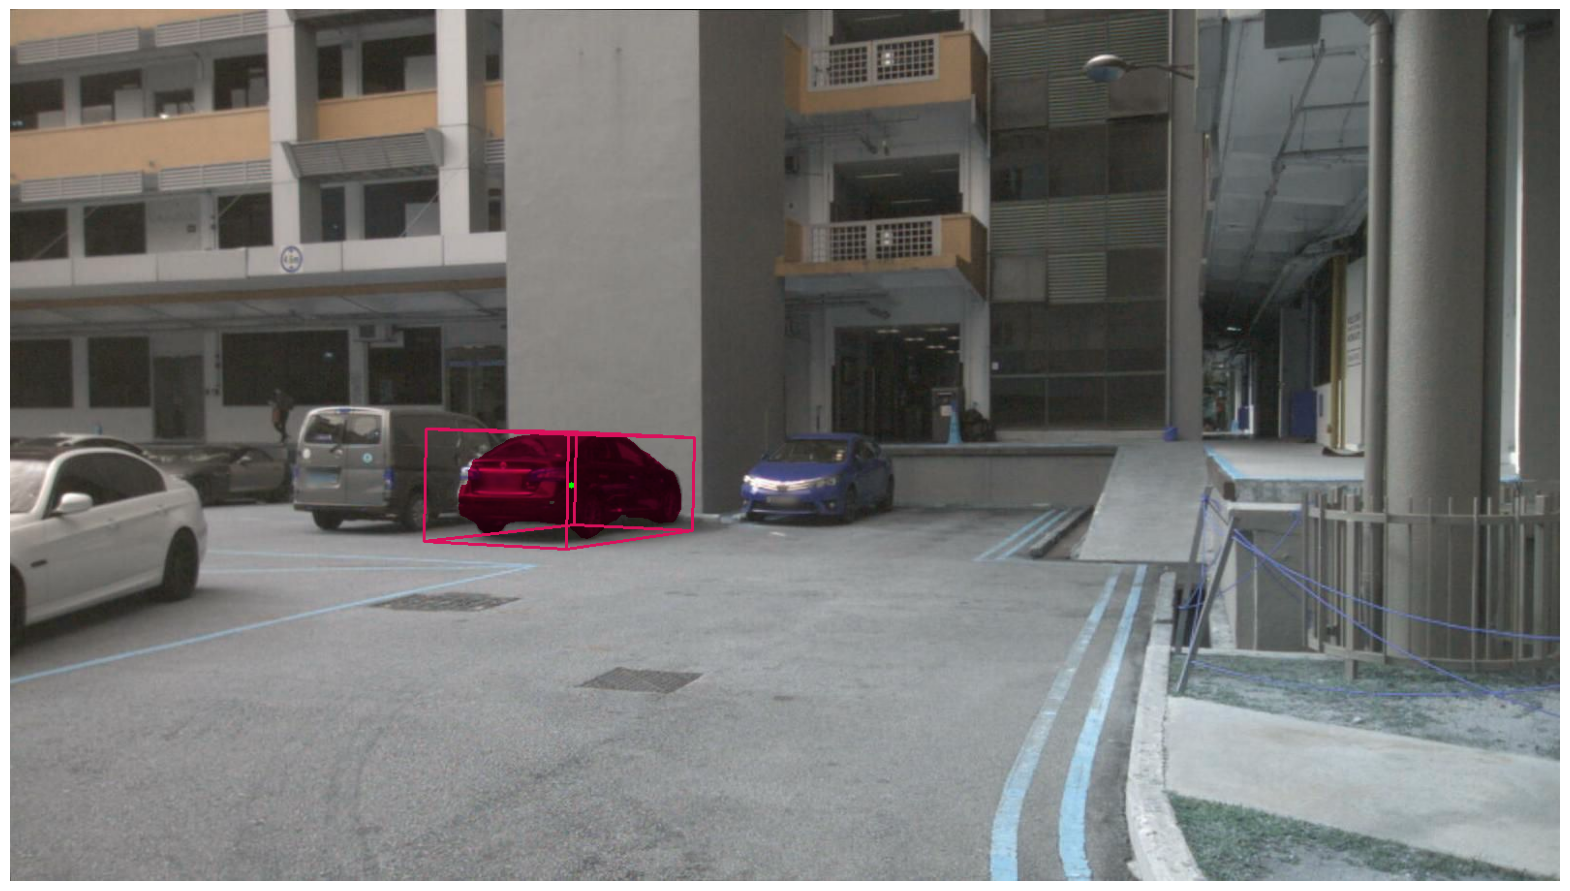

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

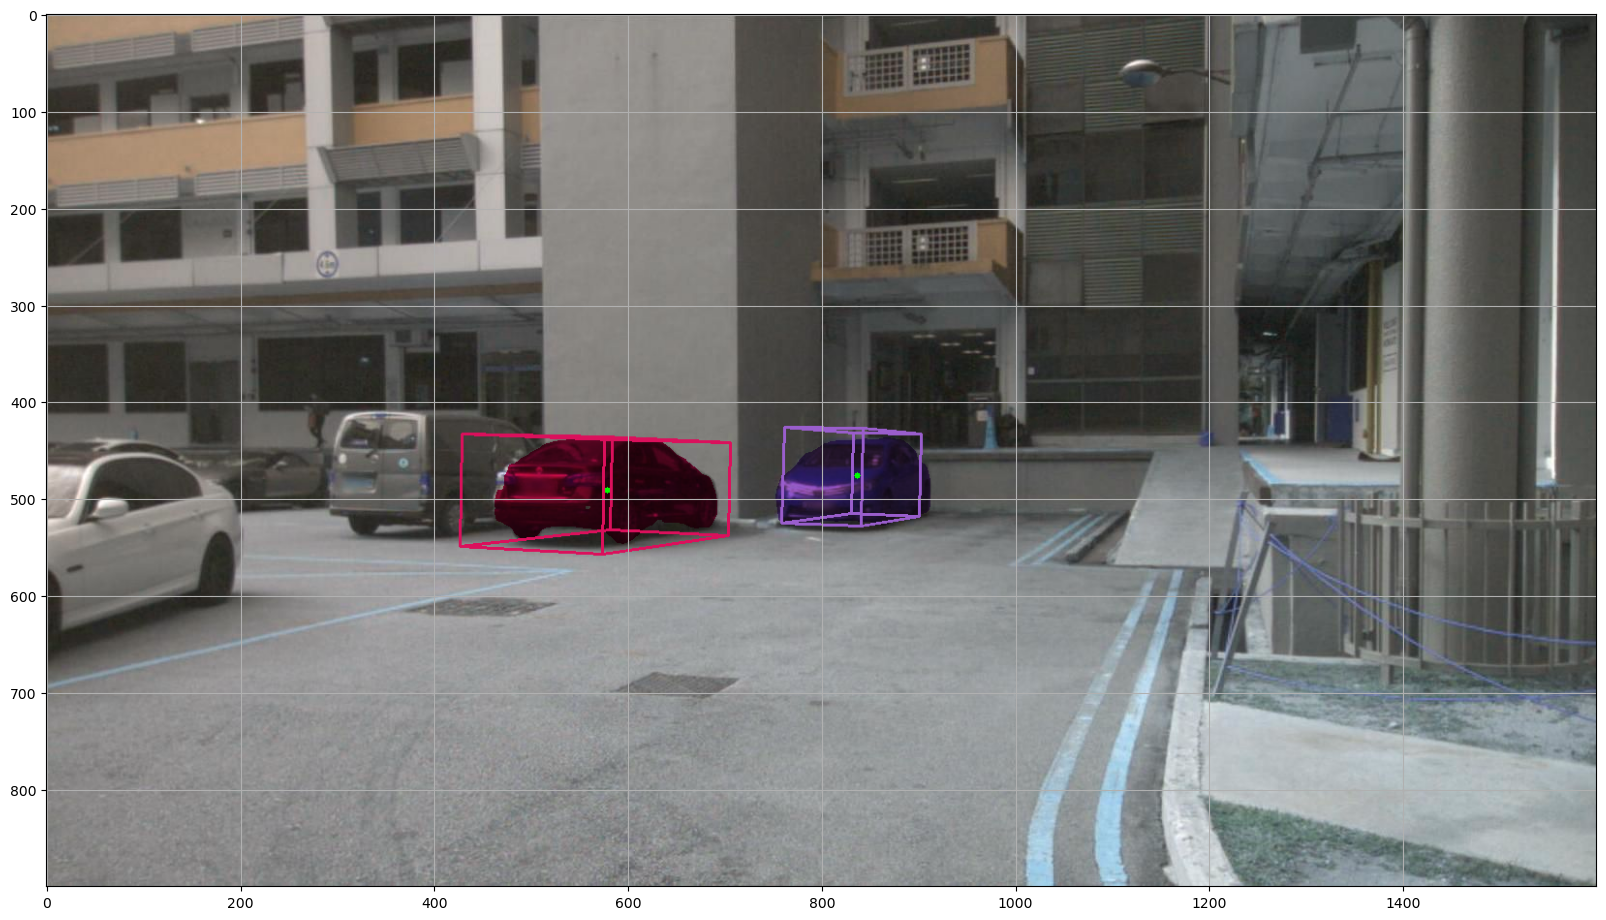

In [13]:
prompt_point = np.array([[820, 450]])
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)
plt.figure(figsize=(20,20))
plt.grid()
plt.imshow(image)
plt.show()

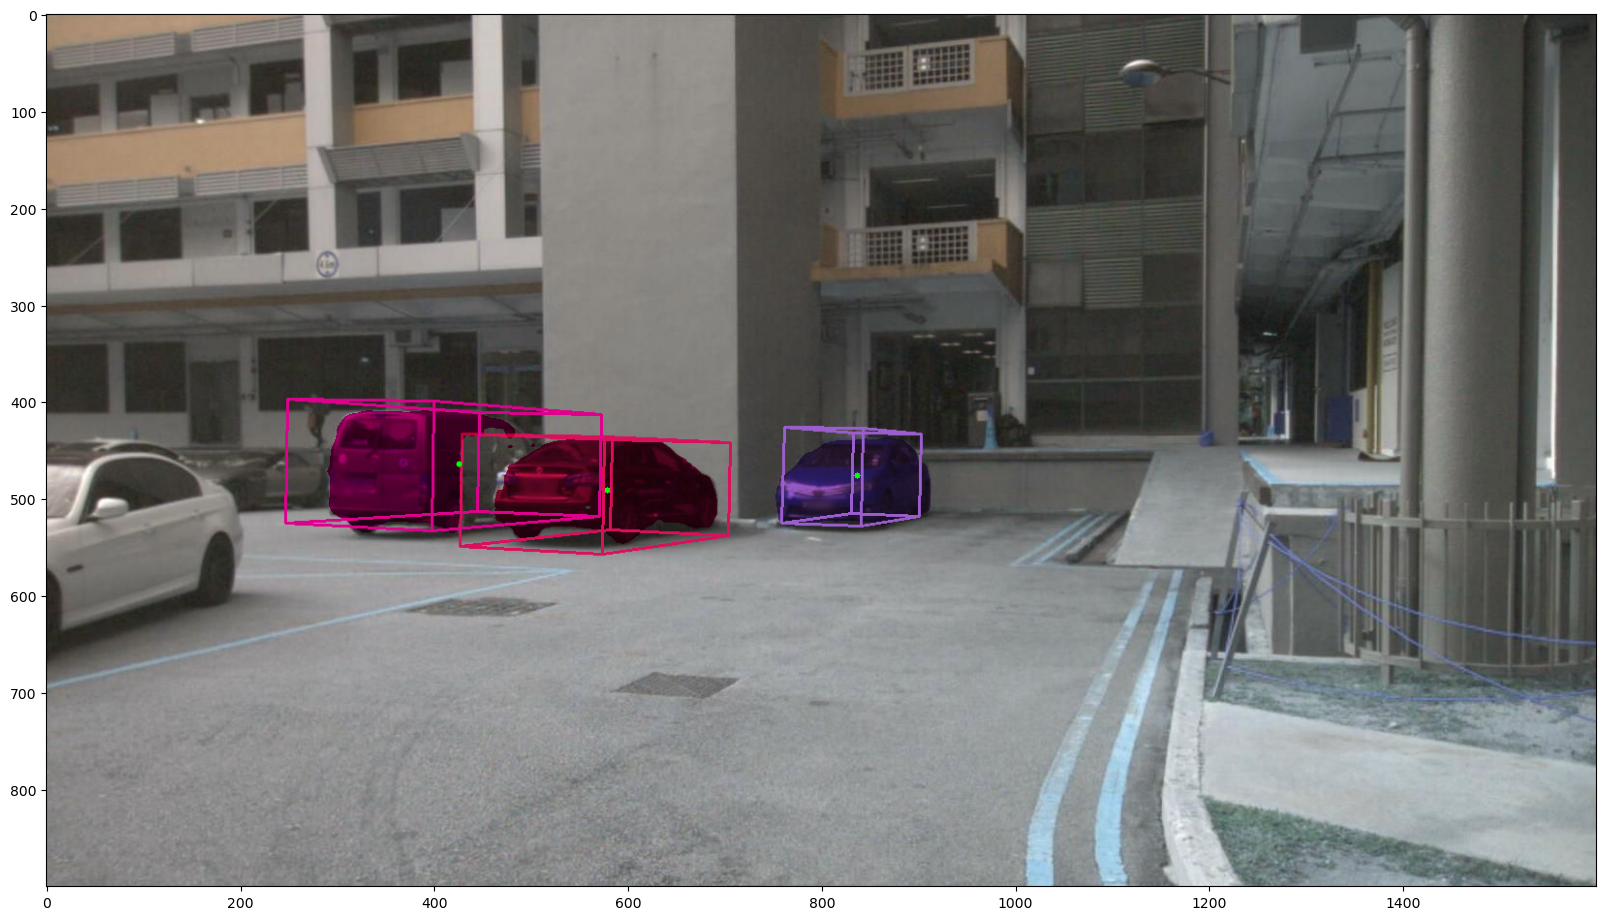

In [14]:
prompt_point = np.array([[350, 470]])
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.show()

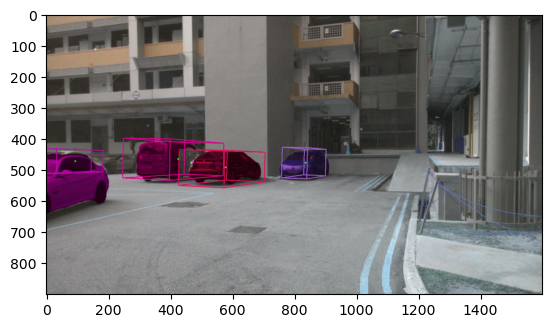

In [15]:
prompt_point = np.array([[100, 500]])
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)
plt.imshow(image)
plt.show()

In [16]:
box3d

tensor([-2.2372e+01, -2.3779e+01, -1.0330e+00,  4.4129e+00,  1.9177e+00,
         1.6921e+00,  2.9756e+00, -2.1728e-08,  7.5798e-10], device='cuda:0',
       grad_fn=<SelectBackward0>)